<a href="https://colab.research.google.com/github/suman1234Acharya/covid-19/blob/main/COVID_19_Data_Analysis_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Worldwide COVID-19 Data Analysis

<br>

## Instructions to Run the Code:

- Click on 'Runtime' on the top menu and then 'Run all'

- You can run individual cells by clicking within a cell and pressing Shift and Enter at the same time

<br>

## Make sure to download the code to save any of your changes!
- Go to File -> Download -> Download .ipynb
- You can then load the downloaded file in your own Colab notebook and edit the code there, where the changes will be saved

<br>

### If you want to download the dataset and view it in Excel, click [here](https://covid.ourworldindata.org/data/owid-covid-data.csv)


In [ ]:
# Necessary imports

import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, Layout
from bokeh.io import output_notebook
from prettytable import PrettyTable
import locale
import warnings

warnings.filterwarnings('ignore')

# For number formatting
locale.setlocale(locale.LC_ALL, '')

# Call once to configure Bokeh to display plots inline in the notebook
output_notebook()

# Style of plots
matplotlib.style.use('seaborn')

In [ ]:
# Load all the data in the CSV file and store it as a DataFrame

df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [ ]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120810,ZWE,Africa,Zimbabwe,2021-09-28,130272.0,353.0,298.000,4615.0,8.0,6.571,8631.760,23.390,19.745,305.788,0.530,0.435,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5290317.0,3060086.0,2230231.0,NaN,26535.0,29469.0,35.05,20.28,14.78,NaN,1953.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
120811,ZWE,Africa,Zimbabwe,2021-09-29,130485.0,213.0,240.143,4616.0,1.0,3.429,8645.873,14.113,15.912,305.854,0.066,0.227,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5320565.0,3071643.0,2248922.0,NaN,30248.0,28149.0,35.25,20.35,14.90,NaN,1865.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
120812,ZWE,Africa,Zimbabwe,2021-09-30,130820.0,335.0,240.85

### As you can see, this CSV file has 120,000+ rows and 65 columns of data!

### View the first 5 rows of the DataFrame

In [ ]:
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


### View the last 5 rows of the DataFrame

In [ ]:
df.tail(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
120810,ZWE,Africa,Zimbabwe,2021-09-28,130272.0,353.0,298.000,4615.0,8.0,6.571,8631.760,23.390,19.745,305.788,0.530,0.435,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5290317.0,3060086.0,2230231.0,NaN,26535.0,29469.0,35.05,20.28,14.78,NaN,1953.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
120811,ZWE,Africa,Zimbabwe,2021-09-29,130485.0,213.0,240.143,4616.0,1.0,3.429,8645.873,14.113,15.912,305.854,0.066,0.227,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5320565.0,3071643.0,2248922.0,NaN,30248.0,28149.0,35.25,20.35,14.90,NaN,1865.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
120812,ZWE,Africa,Zimbabwe,2021-09-30,130820.0,335.0,240.857,4623.0,7.0,3.286,8668.070,22.197,15.959,306.318,0.464,0.218,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5355820.0,3083764.0,2272056.0,NaN,35255.0,27045.0,35.49,20.43,15.05,NaN,1792.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
120813,ZWE,Africa,Zimbabwe,2021-10-01,131028.0,208.0,270.571,4624.0,1.0,3.429,8681.852,13.782,17.928,306.384,0.066,0.227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5387135.0,3097001.0,2290134.0,NaN,31315.0,27110.0,35.69,20.52,15.17,NaN,1796.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
120814,ZWE,Africa,Zimbabwe,2021-10-02,131094.0,66.0,227.000,4625.0,1.0,3.143,8686.225,4.373,15.041,306.450,0.066,0.208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5409000.0,3105712.0,2303288.0,NaN,21865.0,27190.0,35.84,20.58,15.26,NaN,1802.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN



Lets first get a list of all the countries that are included the dataset

We can access columns of DataFrames simply by using the square brackets [],
and inside the brackets, we type in the name of the column

Since the countries are listed in the location column of the DataFrame,
lets go ahead and use that to get a list of all the countries

In [ ]:
df['location']

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
120810       Zimbabwe
120811       Zimbabwe
120812       Zimbabwe
120813       Zimbabwe
120814       Zimbabwe
Name: location, Length: 120815, dtype: object


The problem with using `df['location']` to get a list of all the countries is that due to the nature
of the CSV file, there are hundreds of rows that correspond to each country

If we want a list of each unique country within the location column of the DataFrame, we can simply
use the `set()` function which removes duplicates from a list

Lets also sort all the countries in alphabetical order using the `sorted()` function, this will come in handy later

Lets test it out below:


In [ ]:
all_countries = sorted(set(df['location']))
all_countries

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',


### It worked! We now have a cumulative list of each individual country in the dataset

### Lets get a count for how many countries there are with the len() function

In [ ]:
len(all_countries)

233

#### This CSV file has 65 columns which each correspond to a different metric relating to the country or a COVID-19 data point

#### Lets view all the columns below:

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

#### That's a lot of metrics!

#### Lets focus on just the United States for now for our analysis

In [ ]:
# Use .loc to select rows in a DataFrame
# Lets select all the rows where the location equals 'United States'

us_cases = df.loc[df['location'] == 'United States']
us_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
114492,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
114493,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
114494,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
114495,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
114496,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,-9154.4,-3.68,-3.08,-27.497704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115107,USA,North America,United States,2021-09-28,43226482.0,109605.0,115545.857,692592.0,2157.0,1993.429,129842.369,329.228,347.073,2080.386,6.479,5.988,0.89,20874.0,62.701,72589.0,218.041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,649711.0,NaN,NaN,NaN,NaN,1932.0,61.57,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
115108,USA,North America,United States,2021-09-29,43349749.0,123267.0,114238.286,695123.0,2531.0,1957.143,130212.635,370.266,343.145,2087.989,7.603,5.879,0.88,20395.0,61.262,70769.0,212.574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391992662.0,214043376.0,184335263.0,3677268.0,NaN,642707.0,116.55,

#### Lets print some summary statistics for the US Data
#### We can do this easily with the describe() function

In [ ]:
us_cases.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,6.200000e+02,619.000000,614.000000,582.000000,582.000000,614.000000,620.000000,619.000000,614.000000,582.000000,582.000000,614.000000,575.000000,444.000000,444.000000,444.000000,444.000000,0.0,0.0,62.000000,62.000000,5.760000e+02,5.760000e+02,576.000000,576.000000,5.690000e+02,569.000000,569.000000,569.000000,2.680000e+02,2.670000e+02,2.530000e+02,3.500000e+01,2.540000e+02,2.860000e+02,268.000000,267.000000,253.000000,35.000000,286.000000,616.000000,620.0,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,0.0,6.200000e+02,6.200000e+02,6.200000e+02,82.000000,82.000000,82.000000,82.000000
mean,1.721688e+07,70529.615509,70582.074218,347848.300687,1204.350515,1131.982106,51715.539395,211.854662,212.012272,1044.855943,3.617577,3.400217,1.133513,14063.344595,42.243072,54635.990991,164.113890,NaN,NaN,51073.919355,153.414242,9.982403e+05,2.433555e+08,730.983839,2.998476,1.005826e+06,3.021279,0.072246,18.222847,2.277705e+08,1.316329e+08,1.079193e+08,1.992573e+06,1.485046e+06,1.370822e+06,67.723284,39.138614,32.087984,0.592857,4075.902098,59.412321,332915074.0,3.560800e+01,3.830000e+01,1.541300e+01,9.732000e+00,5.422545e+04,1.200000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01,346435.178049,11.118780,14.767195,1040.611270
std,1.461759e+07,67779.230349,62740.382714,223481.686268,956.383507,854.101812,43907.877804,203.593156,188.457636,671.287382,2.872759,2.565531,0.487501,7536.953618,22.639277,32847.651961,98.666754,NaN,NaN,29623.092567,88.980894,5.576962e+05,1.884966e+08,566.200187,1.675194,4.872366e+05,1.463548,0.038160,10.505262,1.307225e+08,6.899505e+07,6.249658e+07,9.958921e+05,9.322046e+05,8.409471e+05,38.867678,20.514477,18.582445,0.296425,2500.398234,17.594907,0.0,1.493345e-13,4.337810e-13,1.208898e-13,2.666687e-14,5.170101e-10,8.666732e-15,2.161794e-12,3.200024e-14,2.133349e-13,2.488908e-13,NaN,1.466678e-14,4.551145e-13,3.000023e-15,244495.584655,6.061012,12.477590,734.408273
min,1.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.003000,0.000000,0.000000,0.003000,0.000000,0.000000,0.710000,3525.000000,10.588000,12230.000000,36.736000,NaN,NaN,13384.000000,40.202000,3.480000e+02,3.480000e+02,0.001000,0.001000,1.165000e+03,0.003000,0.018000,4.900000,5.562080e+05,5.562080e+05,1.342086e+06,6.428610e+05,5.790900e+04,5.790900e+04,0.170000,0.170000,0.400000,0.190000,172.000000,0.000000,332915074.0,3.560800e+01,3.830000e+01,1.541300e+01,9.732000e+00,5.422545e+04,1.200000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01,-13818.000000,-3.680000,-3.080000,-41.506081
25%,2.415242e+06,24414

# Plotting New Cases Over Time

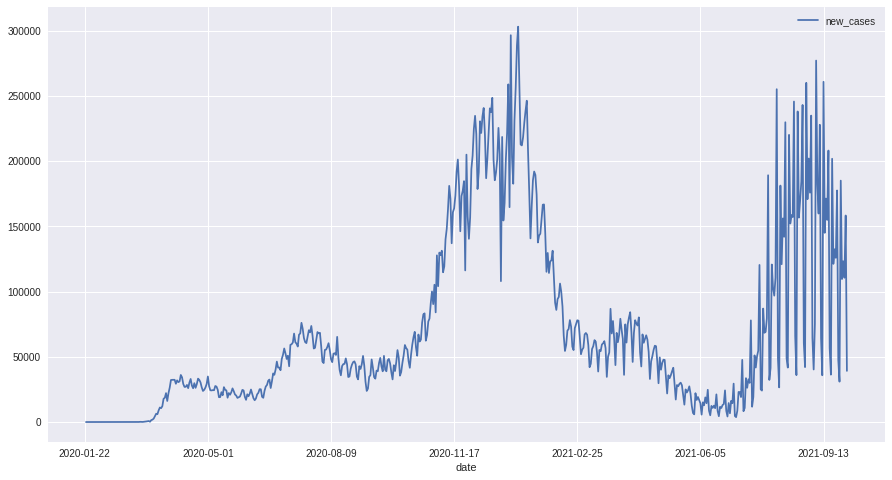

In [ ]:
# To plot columns of a DataFrame, we simply use the plot() function
# We have to specify what metric corresponds to the x and y axis, and the size of the plot

us_cases.plot(x='date', y='new_cases', figsize=(15,8))

# Smoothen out the line with a 7 day moving average

#### Some laboratories do not report data on weekends, so thats why we have such a volatile chart with huge swings up and down

#### By using the 7 day moving average, which is standard when reporting new covid cases, this allows us to get a clearer picture of the cases over time

In [ ]:
us_cases['7_day_avg'] = us_cases['new_cases'].rolling(window=7).mean()

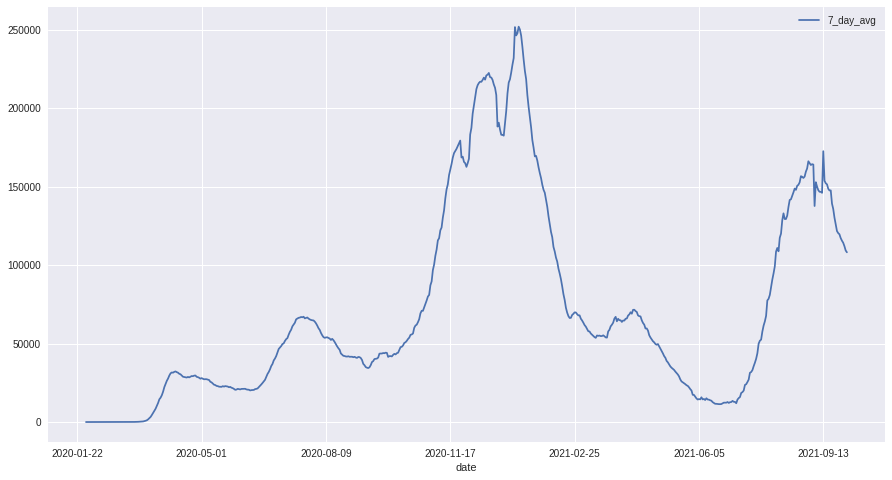

In [ ]:
us_cases.plot(x='date', y='7_day_avg', figsize=(15,8))

# View only the new cases after May 2021


Remember that `.loc` allows us to select rows in a DataFrame

`us_cases['date'] > '2021-05-01'` allows us to access only the rows where the
date is past May 2021

In [ ]:
afterMay2021 = us_cases.loc[us_cases['date'] > '2021-05-01']

afterMay2021['7_day_avg'] = afterMay2021['new_cases'].rolling(window=7).mean()

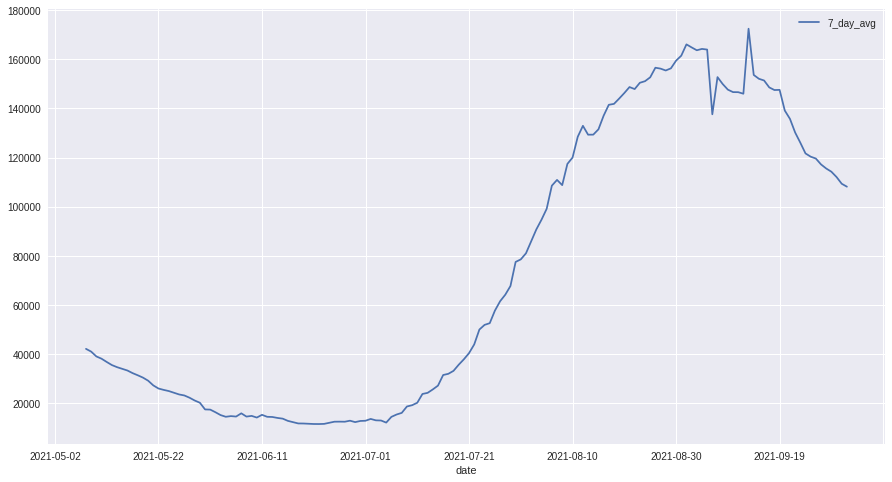

In [ ]:
afterMay2021.plot(x='date', y='7_day_avg', figsize=(15,8))

# Plot any metric over time

- The `interact` function allows us to create a dropdown menu in which the user can select a metric to plot.

- When the user selects a metric from the dropdown menu, the plot updates automatically based on the metric selected


- The `interact` function takes in another function as a paramter, in this case `multiplot`, which plots the metric that the user selected.

- This is done though the code segment `y=metric`, as `metric` in this case is the metric the user selected from the dropdown menu

In [ ]:
def multiplot(metric):
    us_cases.plot(x='date', y=metric, figsize=(15,8), title='United States COVID-19 Data')

interact(multiplot, metric=list(df.columns)[4:])

interactive(children=(Dropdown(description='metric', options=('total_cases', 'new_cases', 'new_cases_smoothed'…

<function __main__.multiplot>

## With just 3 lines of code we created an interactive data visualization tool!

## But we can add more interactivity...

### Through Plotly (https://plotly.com/python/), we can create visualizations that are more interactive

### Plotly allows us to hover over the data and see what the numbers were for that particular date

### You can also adjust the slider on the bottom to view a specific date range

In [ ]:
def multiplot(metric):
    fig = px.line(us_cases, x='date', y=metric, width=1300, height=600)
    fig.update_layout(title_text="United States COVID-19 Data",)
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()


interact(multiplot, metric=list(df.columns)[4:])

interactive(children=(Dropdown(description='metric', options=('total_cases', 'new_cases', 'new_cases_smoothed'…

<function __main__.multiplot>

# Plot any two metrics together

#### We can add another parameter to the `interact` function, which allows us to create another dropdown menu

#### Before, we were simply using the date as the x-axis, but with this, you can select other metrics for the x-axis

In [ ]:
def multiplot(xaxis, yaxis):
    fig = px.line(us_cases, x=xaxis, y=yaxis, width=1300, height=650)
    fig.update_layout(title_text="United States COVID-19 Data",)
    fig.show()

interactive(multiplot, xaxis=list(us_cases.columns[5:]), yaxis=list(us_cases.columns)[4:], )

interactive(children=(Dropdown(description='xaxis', options=('new_cases', 'new_cases_smoothed', 'total_deaths'…

# Plot any set of metrics for US COVID Data

#### Hold down CTRL and click on metrics to select them

In [ ]:
# Create a dropdown menu that allows us to select multiple metrics
dropdown = widgets.SelectMultiple(
    options=list(df.columns)[4:],
    value=['new_cases_smoothed'],
    rows=15,
    description='Metrics',
    disabled=False,
    layout=Layout(width='500px', height='200px')
)


def multiplot(metrics):

    # This is used to avoid more than 1 plot being displayed
    clear_output(wait=True)
    display(dropdown)

    fig = go.Figure()

    # Iterate through the select metrics and plot each of them
    for metric in metrics['new']:
        fig.add_trace(go.Scatter(x=us_cases['date'], y=us_cases[metric], name=metric))

    fig.update_layout(title_text="United States COVID-19 Data", height=650)
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()


dropdown.observe(multiplot, names='value')
display(dropdown)

SelectMultiple(description='Metrics', index=(2, 3), layout=Layout(height='200px', width='500px'), options=('to…

# Compare Countries

### Hold down CTRL to select multiple countries and metrics

In [ ]:
# Here we need two dropdowns:
# One for the user to select countries, one to select metrics

metric_dropdown = widgets.SelectMultiple(
    options=list(df.columns)[4:],
    value=['new_cases_smoothed'],
    rows=15,
    description='Metrics',
    disabled=False,
    layout=Layout(width='500px', height='200px')
)

country_dropdown = widgets.SelectMultiple(
    options=all_countries,
    value=['United States'],
    rows=15,
    description='Country',
    disabled=False,
    layout=Layout(width='500px', height='200px')
)

def multiplot(metrics):

    clear_output(wait=True)
    dropdowns = widgets.HBox([country_dropdown, metric_dropdown])
    display(dropdowns)

    fig = go.Figure()
    fig.data = []

    # We need to iterate through each selected metric for each selected country to plot them
    for metric in metric_dropdown.value:

        for country in country_dropdown.value:

            # Get the data for the selected country
            country_cases = df.loc[df['location'] == country]

            # Plot the metric for that country
            fig.add_trace(go.Scatter(x=country_cases['date'], y=country_cases[metric], name=f"{country} {metric}"))


    fig.update_layout(title_text="COVID-19 Data", height=650)
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()


metric_dropdown.observe(multiplot, names='value')
country_dropdown.observe(multiplot, names='value')

# This allows us to display the dropdown menus side by side
widgets.HBox([country_dropdown, metric_dropdown])

# Lets compare countries based on the most recent COVID data

In [ ]:
# Get the most recent date in the dataset

most_recent_date = df.tail(1)['date'].iloc[0]
most_recent_date

'2021-10-02'

In [ ]:
# Lets group the data together based on location and date

grouped_df = df.groupby(['location', 'date'])

In [ ]:
# Create a DataFrame that contains the most recent data for each country

latest_country_stats = []

for country in all_countries:
    try:
        latest_country_stats.append(grouped_df.get_group((country, most_recent_date)))
    except:
        continue

df_latest = pd.concat(latest_country_stats)

In [ ]:
df_latest

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
586,AFG,Asia,Afghanistan,2021-10-02,155191.0,0.0,33.000,7206.0,0.0,1.000,3895.804,0.000,0.828,180.894,0.000,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.983543e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN,NaN,NaN,NaN
1184,OWID_AFR,NaN,Africa,2021-10-02,8334386.0,6361.0,14477.286,211803.0,210.0,468.571,6068.051,4.631,10.541,154.208,0.153,0.341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.533557e+08,9.314910e+07,6.103166e+07,NaN,21865.0,932982.0,11.17,6.78,4.44,NaN,679.0,NaN,1.373486e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1770,ALB,Europe,Albania,2021-10-02,171327.0,549.0,567.571,2710.0,5.0,11.571,59634.854,191.094,197.558,943.287,1.740,4.028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.872934e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,NaN,NaN,NaN,NaN
2356,DZA,Africa,Algeria,2021-10-02,203657.0,140.0,154.714,5819.0,4.0,7.429,4564.599,3.138,3.468,130.422,0.090,0.166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.461663e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,NaN,NaN,NaN,NaN
2936,AND,Europe,Andorra,2021-10-02,15222.0,0.0,7.857,130.0,0.0,0.000,196783.618,0.000,101.574,1680.585,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.735400e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118337,VNM,Asia,Vietnam,2021-10-02,803202.0,5490.0,8074.857,19601.0,164.0,171.571,8181.844,55.924,82.255,199.666,1.671,1.748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.816883e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,NaN,NaN,NaN,NaN
119147,OWID_WRL,NaN,World,2021-10-02,234627330.0,340793.0,444175.714,4797562.0,5700.0,7765.571,29794.076,43.275,56.404,609.217,0.724,0.986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.312216e+09,3.589157e+09,2.670622e+09,31016494.0,14021363.0

In [ ]:
# Lets sort the DataFrame to see countries with the highest number of new cases

df_sorted = df_latest.sort_values(by='new_cases', ascending=False)
df_sorted

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
119147,OWID_WRL,NaN,World,2021-10-02,234627330.0,340793.0,444175.714,4797562.0,5700.0,7765.571,29794.076,43.275,56.404,609.217,0.724,0.986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.312216e+09,3.589157e+09,2.670622e+09,31016494.0,14021363.0,26194984.0,80.16,45.58,33.91,0.39,3326.0,NaN,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN,NaN,NaN,NaN
6337,OWID_ASI,NaN,Asia,2021-10-02,76073144.0,133516.0,140221.571,1130084.0,1708.0,2006.429,16256.124,28.531,29.964,241.488,0.365,0.429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.253327e+09,2.434631e+09,1.740905e+09,16544525.0,11729301.0,19694402.0,90.89,52.03,37.20,0.35,4209.0,NaN,4.679661e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36922,OWID_EUR,NaN,Europe,2021-10-02,59699891.0,122509.0,129909.429,1231934.0,1743.0,1883.429,79839.651,163.837,173.734,1647.527,2.331,2.519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.031573e+08,4.249338e+08,3.921285e+08,4344407.0,700292.0,1600448.0,107.41,56.83,52.44,0.58,2140.0,NaN,7.477474e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80470,OWID_NAM,NaN,North America,2021-10-02,52514482.0,57348.0,134177.286,1065308.0,1461.0,2703.286,88025.695,96.128,224.910,1785.688,2.449,4.531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.220123e+08,3.448731e+08,2.828339e+08,5756330.0,1037392.0,1670444.0,104.26,57.81,47.41,0.96,2800.0,NaN,5.965813e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37541,OWID_EUN,NaN,European Union,2021-10-02,38027089.0,45231.0,49717.143,772408.0,425.0,604.714,85035.659,101.145,111.177,1727.248,0.950,1.352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.681382e+08,3.009644e+08,2.816525e+08,2944319.0,250876.0,1083355.0,127.05,67.30,62.98,0.66,2423.0,NaN,4.471899e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99842,SOM,Africa,Somalia,2021-10-02,19980.0,0.0,36.714,1111.0,0.0,1.143,1221.309,0.000,2.244,67.912,0.000,0.070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.635950e+07,23.500,16.8,2.731,1.496,NaN,NaN,365.769,6.05,NaN,NaN,9.831,0.900,57.40,NaN,NaN,NaN,NaN,NaN
586,AFG,Asia,Afghanistan,2

In [ ]:
# Get rid of the rows with OWID in the iso_code since we want to focus on individual countries

df_cleaned = df_sorted[~df_sorted.iso_code.str.contains('OWID')]
df_cleaned

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
115111,USA,North America,United States,2021-10-02,43657833.0,39206.0,108132.857,700932.0,647.0,1882.429,131138.048,117.766,324.806,2105.438,1.943,5.654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394690283.0,214870696.0,185143698.0,4742750.0,933417.0,759656.0,117.35,63.89,55.05,1.41,2259.0,NaN,3.329151e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
114491,GBR,Europe,United Kingdom,2021-10-02,7908091.0,29520.0,34400.143,137295.0,124.0,118.571,115942.319,432.799,504.348,2012.913,1.818,1.738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.820711e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
111738,TUR,Asia,Turkey,2021-10-02,7181500.0,27973.0,23984.429,64240.0,203.0,186.000,84445.778,328.929,282.028,755.385,2.387,2.187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110159938.0,53997429.0,44910311.0,11252198.0,234194.0,359716.0,129.53,63.49,52.81,13.23,4230.0,NaN,8.504274e+07,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.820,NaN,NaN,NaN,NaN
90310,RUS,Europe,Russia,2021-10-02,7449689.0,24632.0,22656.000,205297.0,873.0,835.286,51056.033,168.814,155.272,1406.992,5.983,5.725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91015787.0,48535310.0,42480477.0,765175.0,348787.0,258719.0,62.38,33.26,29.11,0.52,1773.0,NaN,1.459120e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
50570,IND,Asia,India,2021-10-02,33813903.0,22842.0,23022.571,448817.0,244.0,271.286,24267.033,16.393,16.522,322.100,0.175,0.195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,901004270.0,656956299.0,244047971.0,NaN,7800286.0,6978224.0,64.66,47.15,17.51,NaN,5008.0,NaN,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99842,SOM,Africa,Somalia,2021-10-02,19980.0,0.0,36.714,1111.0,0.0,1.143,1221.309,0.000,2.244,67.912,0.000,0.070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.635950e+07,23.500,16.8,2.731,1.496,NaN,NaN,365.769,6.05,NaN,NaN,9.831,0.90,57.40,NaN,NaN,NaN,NaN,NaN
586,AFG,Asia,Afghanistan,202

# Compare countries based on the most recent COVID-19 Data

#### View the top 10 countries for a certain metric

In [ ]:
def bar_plot(metric):
    df = df_cleaned.sort_values(by=metric, ascending=False)
    fig = px.bar(df.head(10), x='location', y=metric, width=1300, height=600)
    fig.update_layout(title_text="COVID-19 Data from " + most_recent_date,)
    fig.show()


interact(bar_plot, metric=list(df.columns)[4:])

interactive(children=(Dropdown(description='metric', options=('total_cases', 'new_cases', 'new_cases_smoothed'…

<function __main__.bar_plot>

# Displaying Data in a Tabular Form

### Compare the most recent COVID numbers to last week and the prior month

In [ ]:
def tabulation(country):

    x = PrettyTable()
    x.field_names = ['Metric', 'Current Number', "Last Week's Numbers", "Last Month's Numbers", 'Change from Last Week', 'Change from Last Month']

    # Get the data from the last month to the most recent date
    df_last_month = df[df['location'] == country].iloc[-31:]

    # These are the metrics we are interested in analyzing, you can change / add to this list
    metrics_of_interest = ['new_cases', 'new_deaths', 'new_vaccinations', 'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred']

    for metric in metrics_of_interest:

        current_nums = df_last_month.iloc[-1][metric]

        # Sometimes the most recent number is nan
        if math.isnan(current_nums):
            current_nums = df_last_month.iloc[-2][metric]

        last_week_nums = df_last_month.iloc[-8][metric]

        last_month_nums = df_last_month.iloc[0][metric]

        change_week = current_nums - last_week_nums

        change_month = current_nums - last_month_nums

        x.add_row([metric, f'{current_nums:n}', f'{last_week_nums:n}', f'{last_month_nums:n}',f'{change_week:n}', f'{change_month:n}'])

    print(x)


interact(tabulation, country=all_countries)

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Africa', 'Albania', 'Algeria', …

<function __main__.tabulation>

# Bubble Map of the World

In [ ]:
# Get rid of rows where the continent is 'nan'

df_latest = df_latest[df_latest['continent'].notna()]

In [ ]:
set(df_latest['continent'])

{'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'}

In [ ]:
def bubble_map(metric):

    # We want to get rid of rows that have 'nan' values, they cause errors
    df = df_latest.loc[df_latest[metric].notna()]

    # We also want to get rid of rows that have negative values, these also cause errors
    df = df[~(df[metric] < 0)]

    fig = px.scatter_geo(df, locations="iso_code", color="continent", hover_name="location", size=metric,
                     projection="natural earth", width=1400, height=600)
    fig.show()



interact(bubble_map, metric=list(df.columns)[4:])

interactive(children=(Dropdown(description='metric', options=('total_cases', 'new_cases', 'new_cases_smoothed'…

<function __main__.bubble_map>